Importing Dependencies

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data Collection and Analysis

In [43]:
insurance_data = pd.read_csv('Medical Insurance Cost Prediction Dataset.csv')

In [44]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [45]:
insurance_data.shape

(1338, 7)

In [46]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorial Features

Sex
Smoker
Region

In [47]:
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data Statistics

In [48]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<ipython-input-49-81b1efa5af15>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data['age'])


Text(0.5, 1.0, 'Age Distribution')

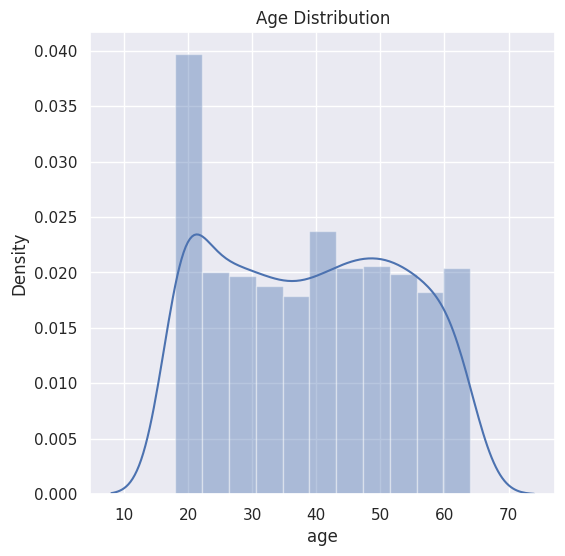

In [49]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['age'])
plt.title('Age Distribution')

Text(0.5, 1.0, 'Sex Distribution')

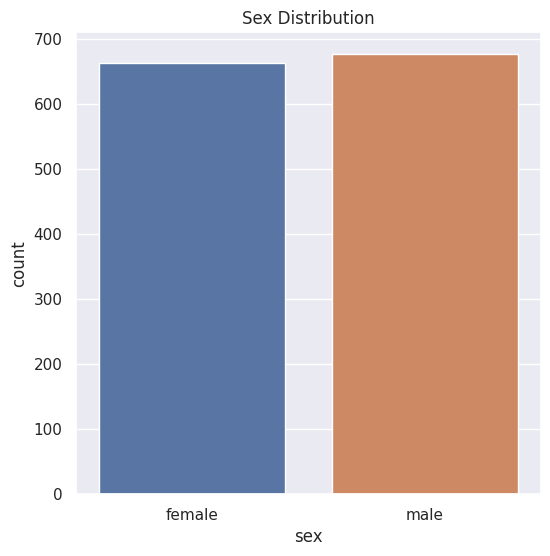

In [50]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_data)
plt.title('Sex Distribution')

In [51]:
insurance_data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<ipython-input-52-9e94f2cf9d33>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data['bmi'])


Text(0.5, 1.0, 'BMI Distribution')

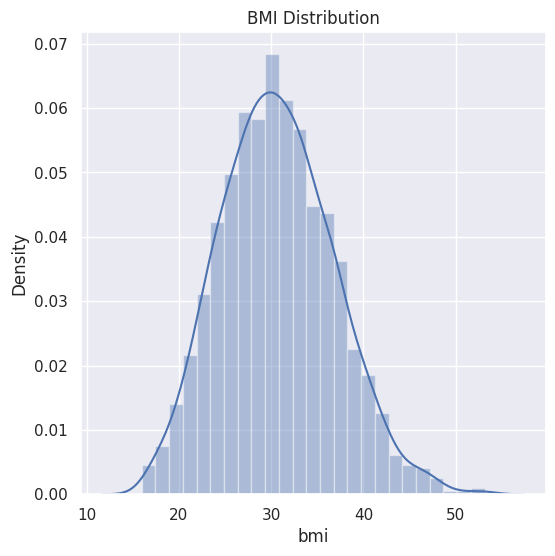

In [52]:
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['bmi'])
plt.title('BMI Distribution')

Text(0.5, 1.0, 'Children')

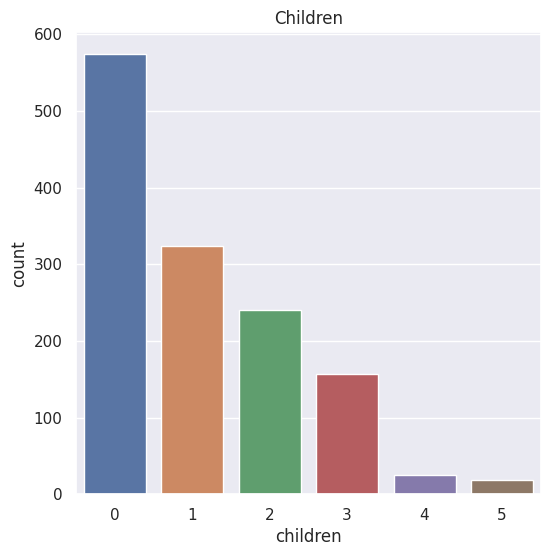

In [53]:
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_data)
plt.title('Children')

In [54]:
insurance_data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

Text(0.5, 1.0, 'Smoker')

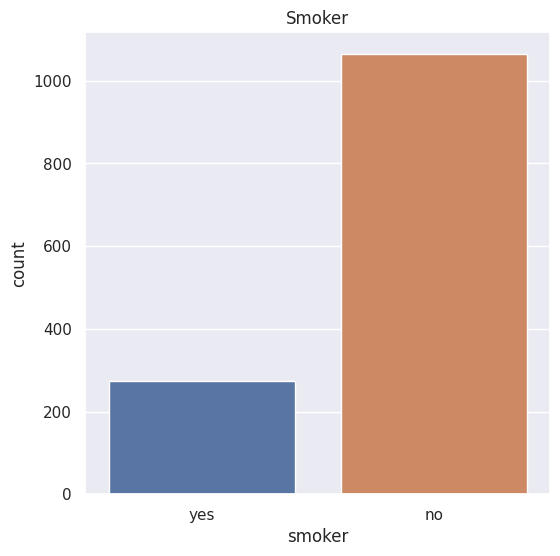

In [55]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_data)
plt.title('Smoker')

In [56]:
insurance_data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

Text(0.5, 1.0, 'Region')

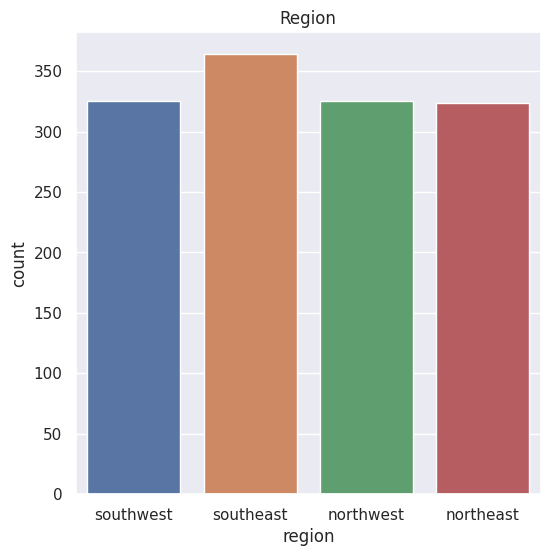

In [57]:
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_data)
plt.title('Region')

In [58]:
insurance_data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<ipython-input-59-daee420e4ba4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data['charges'])


Text(0.5, 1.0, 'Charges')

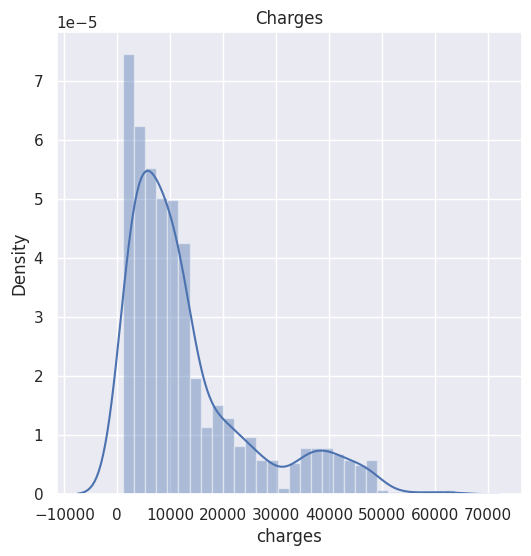

In [59]:
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['charges'])
plt.title('Charges')

Encoding

In [60]:
insurance_data.replace({'sex':{'male':1,'female':1}}, inplace=True)
insurance_data.replace({'smoker':{'yes':0,'no':1}}, inplace=True)
insurance_data.replace({'region':{'southeast':0,'southwest':1,'northwest':2,'northeast':3}}, inplace=True)

In [61]:
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,1,33.770,1,1,0,1725.55230
2,28,1,33.000,3,1,0,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,1,2,10600.54830
1334,18,1,31.920,0,1,3,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


Splitting Features and Targets

In [62]:
X = insurance_data.drop(columns='charges', axis=1)
Y = insurance_data['charges']

Spliting Data into Train and Test Data

In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(X , Y , test_size=0.2 , random_state = 2)

Model Training

In [64]:
regressor = LinearRegression()

In [65]:
regressor.fit(X_train , Y_train)

LinearRegression()

Model Testing

In [66]:
test_data_prediction = regressor.predict(X_test)

In [67]:
r2_score = metrics.r2_score(Y_test, test_data_prediction)
print('R squared value : ', r2_score)

R squared value :  0.7453831948840737


Building a Predictive System

In [68]:
input_data = (31,1,25.74,0,1,0)

Changing Tuple into numpy array

In [69]:
input_data_as_numpy_array = np.asarray(input_data)

Reshaping the array

In [70]:
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

Predicting the Value

In [72]:
prediction = regressor.predict(input_data_reshaped)
print('The insurance cost is USD ', prediction[0])

The insurance cost is USD  3616.657155768431


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
